#Sensores y actuadores
##Perfomance Characteristic of Sensors and Actuators

###1. Transfer function of a position sensor.
The transfer function of a small position sensor is evaluated experimentally. The sensor is made of a very small magnet and the position with respect to the centerline is sensed by the horizontal, from the iron plate. The measurements are given below.


| Displacement, d [mm] 	| 0  	| 0.08  	| 0.16  	| 0.24  	| 0.32  	| 0.4   	| 0.48  	| 0.52  	|
|----------------------	|	|	|  |     |    |  |  |  
| **Force [mN]     **      	|  0 	| 0.576 	| 1.147 	| 1.677 	| 2.187 	| 2.648 	| 3.089 	| 3.295 |


![A simple position sensor.](../Sensores_y_actuadores/images/simple-position-sensor.png "A simple position sensor.")
                                $$Fig. 2.24\ A\ simple\ position\ sensor.$$

1. Find the linear transfer function that best fits these data.    
2. Find a transfer function in the form of a second-order polynomial ($y = a+bf+cf^2$), where $y$ is the displacement and $f$ is the restoring force by evaluating the constants $a$, $b$, and $c$.    
3. Plot the original data together with the transfer functions in (1) and (2) and discuss the errors in the choice of approximation.    

###Solución
Antes de proceder con la solución de cada uno de los puntos es oportuno imprimir los datos y observar el tipo de curva que genera.

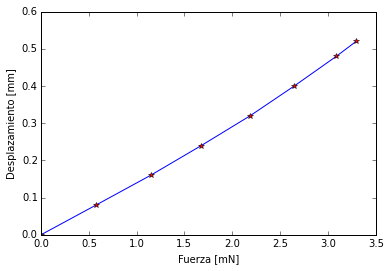

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
d = np.array([0,0.08,0.16,0.24,0.32,0.4,0.48,0.52])
f = np.array([0,0.576,1.147,1.677,2.187,2.648,3.089,3.295])

plt.plot(f,d,'b-')
plt.plot(f,d,'*',color='red')
plt.ylabel('Desplazamiento [mm]')
plt.xlabel('Fuerza [mN]')
plt.show()


* Se nos pide que que hayemos la ecuación líneal, $y = a+bf$, que mejor represente a los valores

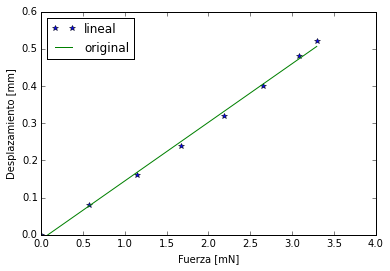

In [8]:
#Hago a fun un vector de  dos valores, en los que se alojan los valores de los coeficientes de la ecuacion lineal(a y b).
fun=np.polyfit(f,d,1)

#convierto a p en la funcion polinomica, de primer orden con los parametros obtenidos con polyfit.
p = np.poly1d(fun)
plt.plot(f,d,'*',label='lineal')
plt.plot(f,p(f),'-',label='original')
plt.ylabel('Desplazamiento [mm]')
plt.xlabel('Fuerza [mN]')
plt.axis([0,4,0,0.6])
plt.legend(loc='upper left')
plt.show()

In [54]:
print "Los valores de los coeficientes son a:",fun[0]," b:",fun[1]

Los valores de los coeficientes son a: 0.157661058706  b: -0.0131058771534


Podemos observar que hay un pequeño error. Se supone que la linea que obtuvimos debe pasar por el (0,0), y lo lo hace, se puede arreglar, pero es un error que se obtiene al obtener un ecuacion leneal de una curva.

* En el segundo inciso nos piden que obtengamos la ecuacione de tranferencia de segundo orden, para lo cual procedemos de manera similar al inciso 1.

In [5]:
fun2=np.polyfit(f,d,2)
p2 = np.poly1d(fun2)

#Obtenemos loscoeficinetes del polinomiode segundo orden
print 'Los coeficientes de la ecuaciones de segundo orden son a =',fun2[0],'b =',fun2[1],'c =',fun2[2]

Los coeficientes de la ecuaciones de segundo orden son a = 0.00926531112283 b = 0.126233269703 c = 0.00187368040221


Lo siguiente es suponer las los graficas que obtivimos,punto 3 del ejercicio, para esto haremos lo siguente:

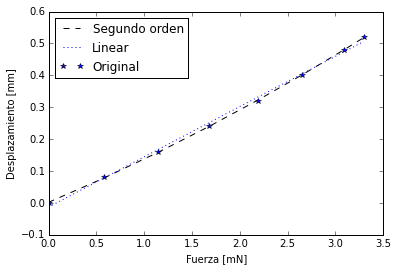

In [9]:
plt.plot(f,p2(f),'--k',label='Segundo orden')
plt.plot(f,p(f),':b',label='Linear')
plt.plot(f,d,'*',label='Original')
plt.ylabel('Desplazamiento [mm]')
plt.xlabel('Fuerza [mN]')
plt.legend(loc='upper left')
plt.show()


###2. Loading effects on actuators.
Suppose an $8\Omega$ loudspeaker is driven from an amplifier under matched conditions, meaning that the amplifier's output equals $8\Omega$. Under these conditions the amplifier transfers maximun power to the loudspeaker. The user decides to connect , identical speaker in parallel to the first to better distribute sound in the room. The amplifier supplies an output voltage $V=48V$.

1. Show that the total power on the two speakers is lower than that supplied to a single speaker.
2. If one desires to maintain the same power, what must be the impedance of the speakers assuming they are still connected in parallel to the amplifier?

Para resolver el **primer punto** del ejercicio debemos tener en cuenta que la potencia, p, es igual a i*v (Corriente * voltaje), en ese orden de ideas:
* Primero consideraremos el amplificador y un solo *loudspeaker*.

se suman las resistencias en  serie, por lo que queda que la $R_{equi}=16\Omega$

$R_{equi}=8\Omega\ + 8\Omega= 16\Omega$

La potencia del *loudspeaker* es igual a:

$i=\frac{48V}{16\Omega}=3A$

$p=i\times v = i²\times R = 8\Omega\times (3A)² = 72W$

* Para es caso de dos *loudspeaker* conectados en paralelo

Se sabe que dos impedancias del mismo valor dan como resultado una impedancia equivalente a la mitad del valor, por eso, si ambos *loudspeaker* son de $8\Omega$ la impedancia equivalente es de $a\Omega$.

Entonces:

$i=\frac{48V}{8 + 4\Omega}=4A$

$p=i\times v = i²\times R = 4\Omega\times (4A)² = 64W$

De esta forma podemos notar que la potencia teniendo conectados en paralelo dos *loudspeakers* es menor que teniendo uno solo

El **segundo punto** se resuelve teniendo en cuenta lo mencionado arriba. dos resistencias de igual valor conectadas en paralelo daran como resistencia equivalente la mitad del valor de una sola. Si se desea mantener la potencia igual, se debe tener una impedancia de $8\Omega$, porlo que ambosspeakers deben tener una impedancia de $16\Omega$ para que su impedancia equivalente sea de $8\Omega$ y se mantenga la potencia.



###3. Power output of an electrical motor.
The torque of a DC motor is linear with the speed of the motor and given in next figure. Find the power transfer function of the motor, that is, the relation between speed and power. Show that maximun mechanical power is obtained at half the lo-load speed and/or half the stall torque.


![Power output of an electrical motor](../Sensores_y_actuadores/images/power-output-motor.png "Power output of an electrical motor")
                                $$Fig. 2.25\ Power\ output\ of\ an\ electrical\ motor.$$

Acontinuación se obtendra la ecuacoine de la recta,$y = a+bf$, que describe la anterior grafica. Para eso se obtendrán los valores de a y b.

In [10]:
k = np.array([0.05,0])
r = np.array([0,6000])
#Hago a fun un vector de  dos valores, en los que se alojan los valores de los coeficientes de la ecuacion lineal(a y b).
funt=np.polyfit(r,k,1)
print "El valor de los coeficientes es a=",funt[0],"b=",funt[1]

El valor de los coeficientes es a= -8.33333333333e-06 b= 0.05


Por teoría conocemos que, $P=\omega \times \tau$, además conocemos los coeficientes de la anterior ecuacion lineal.

$\tau=(-8.333\times10^{-06}\omega + 0.05)$

Entonces, La potencia queda dada de la siguiente forma:

$P=\omega\times(-8.333\times10^{-06}\omega + 0.05)$


$P=-8.333\times10^{-06}\omega^{2} + 0.05\omega$

Teniendo la ecuacion de la potencia, procedemos a derivar para encontrar el valor maximo de la potencia.

$\frac{dP}{d\omega}=2\times-8.333\times10^{-06}\omega + 0.05$

Igualamos la ecuación a 0, y despejamos para hallar el valor de la frecuencia angular

$0=2\times-8.333\times10^{-06}\omega + 0.05$

$-0.05=2\times-8.333\times10^{-06}\omega$

$\omega=\frac{-0.05}{16.666\times10^{-06}}$

Obtenemos el siguiente valor

$\omega=3000 [rpm]$

De esta forma queda demostrado que la maxima potencia se encuentra en la mitad del torque y la mitad de la velocidad angular, considerando que 3000rpm.

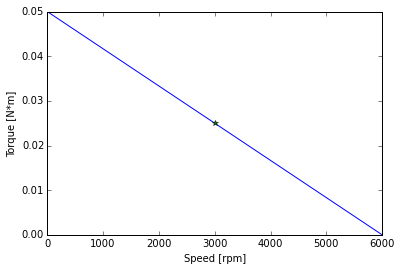

In [18]:
#convierto a p en la funcion polinomica, de primer orden con los parametros obtenidos con polyfit.
g = np.poly1d(funt)
plt.plot(r,g(r),'-')
plt.plot(3000,g(3000),'*')
plt.ylabel('Torque [N*m]')
plt.xlabel('Speed [rpm]')

plt.show()



###4. Hysteresis in a torque sensor.
A torque sensor is calibrated by applying static torque to it(i.e., a certain torque is applied, the sensor is measured, and then the torque is increased or decreased to measure another point of the curve). The following data are obtained. The first set is obtained by increasing torque, the second by decreasing it.


$$Increasing\ torque$$

|Applied torque [$N*m$]    |2.3    |3.14| 4  |4.84| 5.69| 6.54|7.39| 8.25| 9.09| 9.52| 10.37| 10.79|
|--------------------------|       |         |    |    | 
|**Sensed torque [$N*m$]** |  2.51 |2.99|3.54|4.12| 4.71| 5.29|5.87| 6.4| 6.89| 7.1| 7.49 |7.62|

$$Decreasing\ torque$$

|Applied torque [$N*m$]    |10.79 |10.37| 9.52| 9.09| 8.25| 7.39| 6.54| 5.69| 4.84| 4| 3.14| 2.3|
|--------------------------|       |         |    |    | 
|**Sensed torque [$N*m$]** |  7.68 |7.54 |7.22 |7.05| 6.68| 6.26| 5.8| 5.29| 4.71| 4.09| 3.37| 2.54|

1. Plot the transfer function of the torque sensor using a second-order least squares approximation.
2. Calculate the maximum error due to hysteresis as a percentage of full scale.


Por facilidad se creara un solo vector correspondiente al torque aplicada y dos vectores de torque sensado
uno para cuando incremente y otro para cuando decrezca.
 

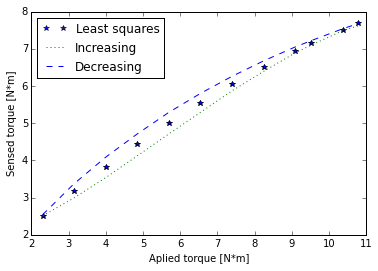

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

vecta  = np.array([2.3, 3.14 ,4 ,4.84, 5.69 ,6.54, 7.39, 8.25, 9.09, 9.52, 10.37, 10.79])
vectup = np.array([2.51 ,2.99 ,3.54 ,4.12 ,4.71 ,5.29 ,5.87 ,6.4 ,6.89 ,7.1 ,7.49 ,7.62])
vectd  = np.array([2.54 ,3.37, 4.09 ,4.71, 5.29, 5.8, 6.26, 6.68, 7.05, 7.22, 7.54, 7.68])
vecta2 = np.array([2.3, 3.14 ,4 ,4.84, 5.69 ,6.54, 7.39, 8.25, 9.09, 9.52, 10.37, 10.79,2.3, 3.14 ,4 ,4.84, 5.69 ,6.54, 7.39, 8.25, 9.09, 9.52, 10.37, 10.79])
vectupnd=np.array([2.51 ,2.99 ,3.54 ,4.12 ,4.71 ,5.29 ,5.87 ,6.4 ,6.89 ,7.1 ,7.49 ,7.62,2.54 ,3.37, 4.09 ,4.71, 5.29, 5.8, 6.26, 6.68, 7.05, 7.22, 7.54, 7.68])

#Hago a fun un vector de  dos valores, en los que se alojan los valores de los coeficientes de la ecuacion
#cuadrática(a, b y c).
y=np.polyfit(vecta2,vectupnd,2)

ans= np.poly1d(y)
plt.plot(vecta2,ans(vecta2),'*',label='Least squares')
plt.plot(vecta,vectup,'g:',label='Increasing')
plt.plot(vecta,vectd,'b--',label='Decreasing')
plt.ylabel('Sensed torque [N*m]')
plt.xlabel('Aplied torque [N*m]')
plt.legend(loc='upper left')
plt.show()

In [68]:
out1=np.zeros([12],dtype=np.float32)
#En out1 es un vector que contendrá todos los valores correspondientes a la funcion ans teniendo como 
# parametro el vector vecta[1]

for i in range(12):
    out1[i]=ans(vecta[i])


flag=0;
posicion=0;
line=0;
for i in range(12):
    error=abs((vectup[i]-out1[i])/out1[i])
    
    if(error>flag):
        flag=error
        posicion=i
        line=1

    error=abs((vectd[i]-out1[i])/out1[i])

    if(error>flag):
        flag=error
        posicion=i
        line=2
print "linea 1 =Funcion Incremento del torque"        
print "linea 2 =Funcion Decremento del torque"   
print ""
print "El máximo error es ",flag ,", se encuentra en la linea",line," en la posicion",posicion

linea 1 =Funcion Incremento del torque
linea 2 =Funcion Decremento del torque

El máximo error es  0.0768317745475 , se encuentra en la linea 1  en la posicion 2
